In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


In [12]:
ruta_csv = "../data/processed/propiedades_geolocalizadas_final.csv"
df = pd.read_csv(ruta_csv)

# Columnas a eliminar
cols_a_eliminar = ['Unnamed: 16', 'Comuna_match_raw', 'Descripcion', 'Quien_Vende', 'Corredor', 'Dirección', 'Link', 'ID', 'Tipo_Vivienda']

# Eliminar columnas si existen en el DataFrame
df = df.drop(columns=[col for col in cols_a_eliminar if col in df.columns])

print("Columnas eliminadas:", cols_a_eliminar)
print("Columnas restantes:", df.columns.tolist())


print("Primeras filas del dataset:")
display(df.head())


Columnas eliminadas: ['Unnamed: 16', 'Comuna_match_raw', 'Descripcion', 'Quien_Vende', 'Corredor', 'Dirección', 'Link', 'ID', 'Tipo_Vivienda']
Columnas restantes: ['Comuna', 'N_Habitaciones', 'N_Baños', 'N_Estacionamientos', 'Total_Superficie', 'Superficie_Construida', 'Valor_UF', 'Valor_CLP', 'Latitud', 'Longitud']
Primeras filas del dataset:


,Comuna,N_Habitaciones,N_Baños,N_Estacionamientos,Total_Superficie,Superficie_Construida,Valor_UF,Valor_CLP,Latitud,Longitud
0,Conchalí,3,2,3,160.00,0.0,2929.64,115000000,-33.381808,-70.667314
1,Lampa,4,1,2,78.00,50.0,1732.31,68000000,-33.286489,-70.882639
2,Padre Hurtado,3,1,3,70.00,45.0,2165.38,85000000,-33.581050,-70.810799
3,La Florida,3,2,2,123.00,60.0,3184.39,125000000,-33.545736,-70.587604
4,Lampa,3,1,1,87.48,78.0,1745.05,68500000,-33.286914,-70.883034


In [13]:
print("\nInformación general del dataset:")
df.info()



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9654 entries, 0 to 9653
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Comuna                 9654 non-null   object 
 1   N_Habitaciones         9654 non-null   int64  
 2   N_Baños                9654 non-null   int64  
 3   N_Estacionamientos     9654 non-null   int64  
 4   Total_Superficie       9654 non-null   float64
 5   Superficie_Construida  9654 non-null   float64
 6   Valor_UF               9654 non-null   float64
 7   Valor_CLP              9654 non-null   int64  
 8   Latitud                9654 non-null   float64
 9   Longitud               9654 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 754.3+ KB


In [14]:
print("\nEstadísticas descriptivas para variables numéricas:")
display(df.describe())



Estadísticas descriptivas para variables numéricas:


,N_Habitaciones,N_Baños,N_Estacionamientos,Total_Superficie,Superficie_Construida,Valor_UF,Valor_CLP,Latitud,Longitud
count,9654.000000,9654.000000,9654.000000,9654.000000,9654.000000,9.654000e+03,9.654000e+03,9654.000000,9654.000000
mean,3.995028,2.704889,1.969443,701.114679,207.510319,2.324307e+04,9.123836e+08,-33.464185,-70.647463
std,1.795218,1.540376,5.576734,7069.730064,1385.205135,1.130903e+06,4.439247e+10,0.119502,0.105996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-33.869011,-70.995895
25%,3.000000,2.000000,0.000000,136.000000,84.000000,3.300000e+03,1.295382e+08,-33.544913,-70.724040
50%,4.000000,3.000000,2.000000,230.000000,125.000000,6.000000e+03,2.355240e+08,-33.463268,-70.633151
75%,5.000000,3.000000,3.000000,459.000000,196.000000,1.340000e+04,5.260036e+08,-33.391067,-70.558249
max,45.000000,32.000000,500.000000,650193.000000,118070.000000,1.100000e+08,4.317940e+12,-33.001280,-70.166641


In [15]:
print("\nCantidad de valores nulos por columna:")
display(df.isnull().sum())



Cantidad de valores nulos por columna:


Comuna                   0
N_Habitaciones           0
N_Baños                  0
N_Estacionamientos       0
Total_Superficie         0
Superficie_Construida    0
Valor_UF                 0
Valor_CLP                0
Latitud                  0
Longitud                 0
dtype: int64

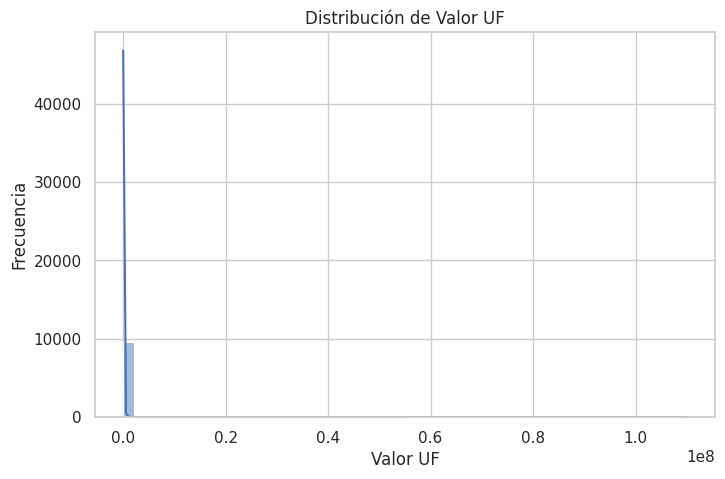

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['Valor_UF'], bins=50, kde=True)
plt.title('Distribución de Valor UF')
plt.xlabel('Valor UF')
plt.ylabel('Frecuencia')
plt.show()


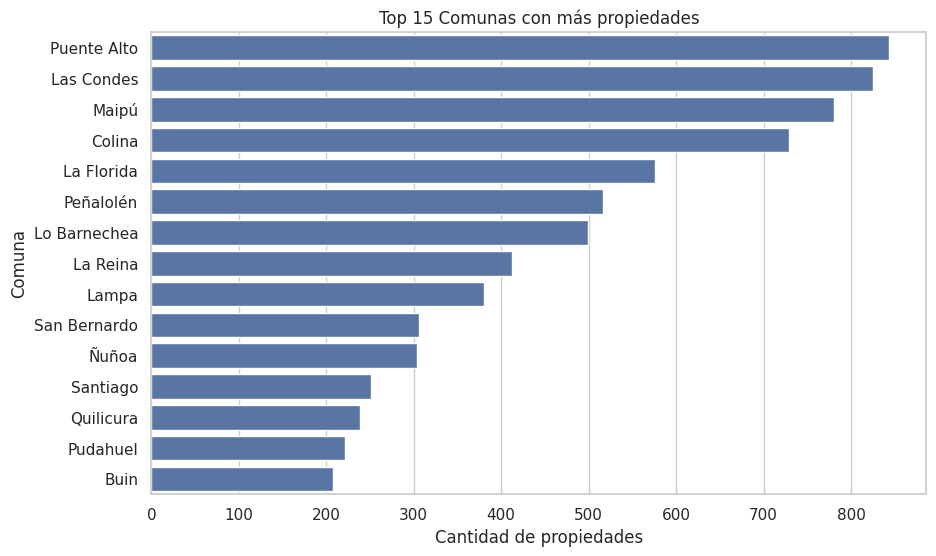

In [17]:
plt.figure(figsize=(10,6))
top_comunas = df['Comuna'].value_counts().head(15)
sns.barplot(x=top_comunas.values, y=top_comunas.index)
plt.title('Top 15 Comunas con más propiedades')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Comuna')
plt.show()


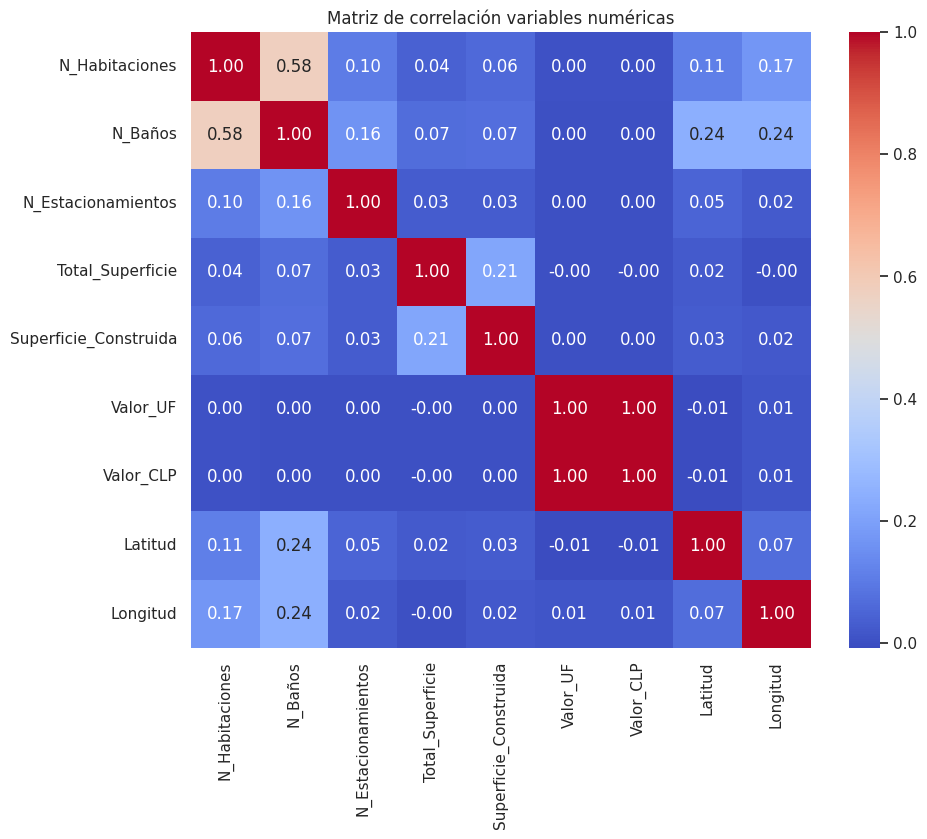

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de correlación variables numéricas')
plt.show()
